## Part 1: Initial Setup and Data Exploration


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('financial_health_analysis_dataset.csv')

In [9]:
print("DATASET OVERVIEW")
print(f"Number of records: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(df.columns)
df.head()


DATASET OVERVIEW
Number of records: 20000
Number of columns: 12
Index(['Date', 'Revenue', 'Expenses', 'Profit', 'Cash Flow', 'Debt', 'Assets',
       'Liabilities', 'Marketing Spend', 'Employee Count', 'Tax Paid',
       'Operational Cost'],
      dtype='object')


,Date,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost
0,2000-01-01,91910,56996,34914,36583,37428,50606,50085,14159,278,7633,42235.94
1,2000-01-02,76044,17614,58430,57621,15068,143451,53894,12173,346,11913,12960.62
2,2000-01-03,87214,49647,37567,42285,20229,67733,30019,15107,379,11490,39471.72
3,2000-01-04,53827,72940,-19113,-16957,33478,90394,53827,17132,444,3905,56926.27
4,2000-01-05,75820,15620,60200,63913,21908,110797,28184,14723,220,13197,12298.48


## Part 2: Data Cleaning

In [ ]:
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})

print(missing_df[missing_df['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


no missing values found

In [ ]:
print("HANDLING MISSING VALUES")

# Create a copy for cleaning
df_clean = df.copy()

# Convert Date column to datetime if it's not already
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


# Check each numerical column for outliers
numerical_cols = ['Revenue', 'Expenses', 'Profit', 'Cash Flow', 'Debt', 'Assets',
       'Liabilities', 'Marketing Spend', 'Employee Count', 'Tax Paid',
       'Operational Cost']

# Handle missing values using forward fill method
# This makes sense for financial data as values tend to be similar month-to-month
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        before_count = df_clean[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna(method='ffill')  # forward fill
        
        # If still missing (first row), use backward fill
        df_clean[col] = df_clean[col].fillna(method='bfill')
        
        after_count = df_clean[col].isnull().sum()
        print(f"{col}: {before_count} missing values filled")

# Recalculate profit to ensure consistency
df_clean['Profit'] = df_clean['Revenue'] - df_clean['Expenses']


HANDLING MISSING VALUES


In [ ]:
print("OUTLIER DETECTION")

def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

for col in numerical_cols:
    outliers = detect_outliers(df_clean[col])
    print(f"{col}: {len(outliers)} outliers detected")
    if len(outliers) > 0:
        print(f"  Outlier values: {outliers.values[:5]}...")  # show first 5


OUTLIER DETECTION
Revenue: 0 outliers detected
Expenses: 0 outliers detected
Profit: 0 outliers detected
Cash Flow: 0 outliers detected
Debt: 0 outliers detected
Assets: 0 outliers detected
Liabilities: 0 outliers detected
Marketing Spend: 0 outliers detected
Employee Count: 0 outliers detected
Tax Paid: 0 outliers detected
Operational Cost: 0 outliers detected

Decision: Keeping outliers as they may represent significant business events


In [ ]:
print("DATA CONSISTENCY CHECKS")

# Check for negative values where they shouldn't exist
print("\nChecking for unexpected negative values:")
for col in ['Revenue', 'Assets']:
    negative_count = (df_clean[col] < 0).sum()
    if negative_count > 0:
        print(f"{col}: {negative_count} negative values found (may need investigation)")
    else:
        print(f"{col}: No negative values")

DATA CONSISTENCY CHECKS

Checking for unexpected negative values:
Revenue: No negative values
Assets: No negative values

Data cleaning completed!


## Part 3: Exploratory Data Analysis (EDA)


In [15]:
print("DESCRIPTIVE STATISTICS")

desc_stats = df_clean[numerical_cols].describe()
print(desc_stats)

# Additional statistics
print("\n=== ADDITIONAL STATISTICS ===")
for col in numerical_cols:
    mode_val = df_clean[col].mode().values[0] if len(df_clean[col].mode()) > 0 else "No mode"
    skewness = stats.skew(df_clean[col])
    kurtosis = stats.kurtosis(df_clean[col])
    
    print(f"\n{col}:")
    print(f"  Mode: {mode_val:,.2f}" if isinstance(mode_val, (int, float)) else f"  Mode: {mode_val}")
    print(f"  Skewness: {skewness:.3f}")
    print(f"  Kurtosis: {kurtosis:.3f}")


DESCRIPTIVE STATISTICS
            Revenue      Expenses       Profit     Cash Flow          Debt  \
count  20000.000000  20000.000000  20000.00000  20000.000000  20000.000000   
mean   59508.545100  47249.836400  12258.70870  12248.088650  30082.962300   
std    23209.165749  18862.986125  29843.89368  29982.651637  11532.833832   
min    20002.000000  15002.000000 -59398.00000 -62580.000000  10001.000000   
25%    39384.000000  30729.750000  -9143.00000  -9307.000000  20124.750000   
50%    59138.500000  46881.000000  12519.00000  12370.500000  30209.000000   
75%    79509.250000  63630.750000  33641.00000  33594.000000  40115.000000   
max    99996.000000  79994.000000  84313.00000  86768.000000  49999.000000   

              Assets   Liabilities  Marketing Spend  Employee Count  \
count   20000.000000  20000.000000     20000.000000    20000.000000   
mean    99968.189150  44978.947150     12483.372500      274.786350   
std     28822.209403  14505.592213      4340.376592      130.

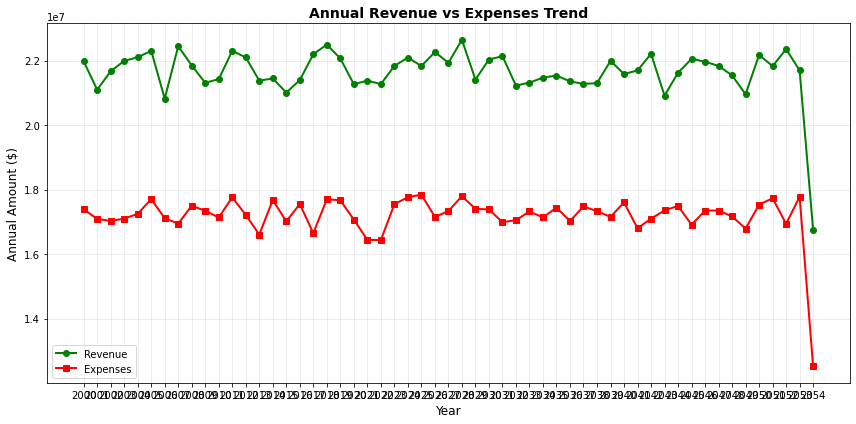

Average year-over-year revenue growth: -0.41%
Average year-over-year expense growth: -0.47%


In [21]:
# Visualization 1: Revenue and Expenses trends over time (Year-wise accumulation)
# Extract year from date and group by year
df_clean['Year'] = df_clean['Date'].dt.year
yearly_data = df_clean.groupby('Year').agg({
    'Revenue': 'sum',
    'Expenses': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Revenue'], marker='o', linewidth=2, label='Revenue', color='green')
plt.plot(yearly_data['Year'], yearly_data['Expenses'], marker='s', linewidth=2, label='Expenses', color='red')

plt.title('Annual Revenue vs Expenses Trend', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Amount ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(yearly_data['Year'])
plt.tight_layout()
plt.show()

# Calculate year-over-year growth rates
revenue_growth = yearly_data['Revenue'].pct_change().mean() * 100
expense_growth = yearly_data['Expenses'].pct_change().mean() * 100

print(f"Average year-over-year revenue growth: {revenue_growth:.2f}%")
print(f"Average year-over-year expense growth: {expense_growth:.2f}%")

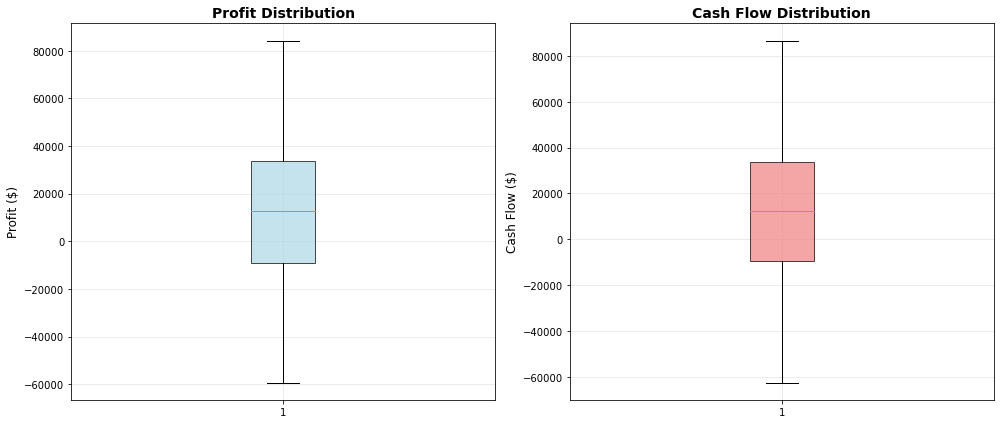

=== QUARTILE ANALYSIS ===

Profit:
  Q1 (25%): $-9,143.00
  Q2 (Median): $12,519.00
  Q3 (75%): $33,641.00

Cash Flow:
  Q1 (25%): $-9,307.00
  Q2 (Median): $12,370.50
  Q3 (75%): $33,594.00


In [19]:
# Visualization 2: Box plots for Profit and Cash Flow
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Profit box plot
axes[0].boxplot(df_clean['Profit'], patch_artist=True, 
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0].set_title('Profit Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Profit ($)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Cash Flow box plot
axes[1].boxplot(df_clean['Cash Flow'], patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1].set_title('Cash Flow Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Cash Flow ($)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print quartile information
print("=== QUARTILE ANALYSIS ===")
for col in ['Profit', 'Cash Flow']:
    Q1 = df_clean[col].quantile(0.25)
    Q2 = df_clean[col].quantile(0.50)  # median
    Q3 = df_clean[col].quantile(0.75)
    print(f"\n{col}:")
    print(f"  Q1 (25%): ${Q1:,.2f}")
    print(f"  Q2 (Median): ${Q2:,.2f}")
    print(f"  Q3 (75%): ${Q3:,.2f}")


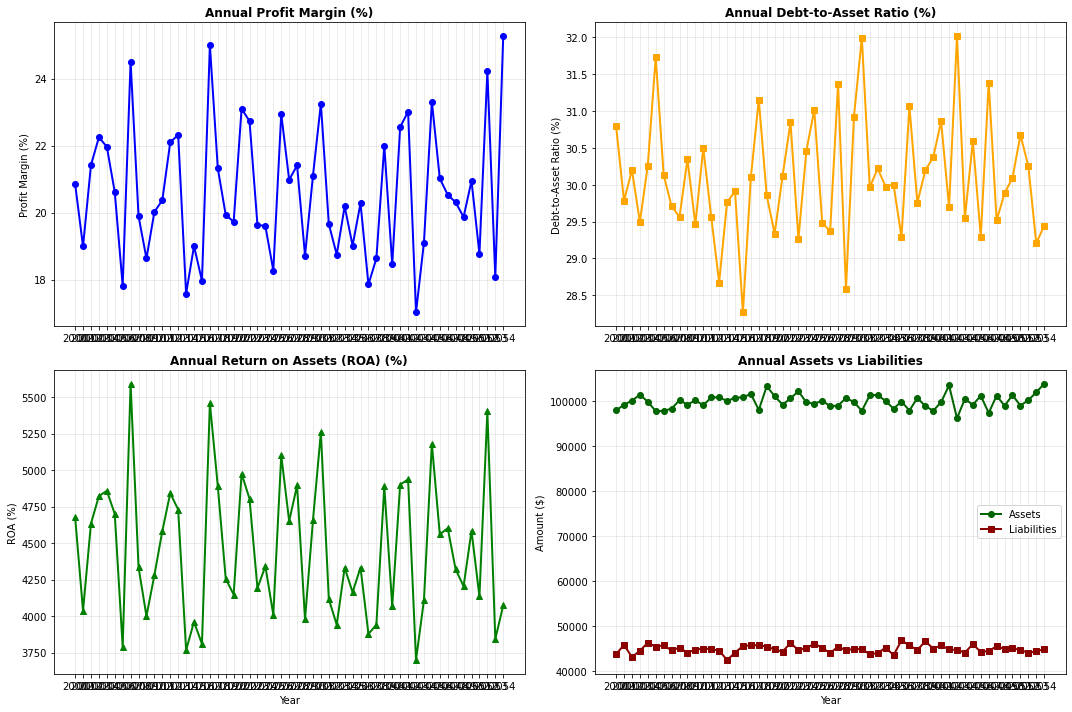

=== ANNUAL FINANCIAL RATIOS SUMMARY ===
Average Annual Profit Margin: 20.60%
Average Annual Debt-to-Asset Ratio: 30.10%
Average Annual ROA: 4458.75%

=== YEARLY BREAKDOWN ===
Year 2000:
  Total Revenue: $21,977,632.00
  Total Profit: $4,583,807.00
  Profit Margin: 20.86%
  ROA: 4677.79%
  Debt-to-Asset Ratio: 30.80%

Year 2001:
  Total Revenue: $21,096,388.00
  Total Profit: $4,005,856.00
  Profit Margin: 18.99%
  ROA: 4036.54%
  Debt-to-Asset Ratio: 29.78%

Year 2002:
  Total Revenue: $21,669,485.00
  Total Profit: $4,640,653.00
  Profit Margin: 21.42%
  ROA: 4634.04%
  Debt-to-Asset Ratio: 30.20%

Year 2003:
  Total Revenue: $21,993,063.00
  Total Profit: $4,892,870.00
  Profit Margin: 22.25%
  ROA: 4821.64%
  Debt-to-Asset Ratio: 29.50%

Year 2004:
  Total Revenue: $22,102,449.00
  Total Profit: $4,854,704.00
  Profit Margin: 21.96%
  ROA: 4858.34%
  Debt-to-Asset Ratio: 30.26%

Year 2005:
  Total Revenue: $22,305,180.00
  Total Profit: $4,598,538.00
  Profit Margin: 20.62%
  ROA: 4

In [23]:
# Visualization 3: Financial ratios analysis by year
# First, group data by year for annual analysis
df_clean['Year'] = df_clean['Date'].dt.year
yearly_financial = df_clean.groupby('Year').agg({
    'Revenue': 'sum',
    'Expenses': 'sum', 
    'Profit': 'sum',
    'Assets': 'mean',  # Average assets for the year
    'Liabilities': 'mean',  # Average liabilities for the year
    'Debt': 'mean'  # Average debt for the year
}).reset_index()

# Calculate annual financial ratios
yearly_financial['Profit_Margin'] = (yearly_financial['Profit'] / yearly_financial['Revenue']) * 100
yearly_financial['Debt_to_Asset_Ratio'] = (yearly_financial['Debt'] / yearly_financial['Assets']) * 100
yearly_financial['ROA'] = (yearly_financial['Profit'] / yearly_financial['Assets']) * 100  # Return on Assets

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Profit margin by year
axes[0,0].plot(yearly_financial['Year'], yearly_financial['Profit_Margin'], marker='o', color='blue', linewidth=2)
axes[0,0].set_title('Annual Profit Margin (%)', fontweight='bold')
axes[0,0].set_ylabel('Profit Margin (%)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(yearly_financial['Year'])

# Debt to Asset ratio by year
axes[0,1].plot(yearly_financial['Year'], yearly_financial['Debt_to_Asset_Ratio'], marker='s', color='orange', linewidth=2)
axes[0,1].set_title('Annual Debt-to-Asset Ratio (%)', fontweight='bold')
axes[0,1].set_ylabel('Debt-to-Asset Ratio (%)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xticks(yearly_financial['Year'])

# Return on Assets by year
axes[1,0].plot(yearly_financial['Year'], yearly_financial['ROA'], marker='^', color='green', linewidth=2)
axes[1,0].set_title('Annual Return on Assets (ROA) (%)', fontweight='bold')
axes[1,0].set_ylabel('ROA (%)')
axes[1,0].set_xlabel('Year')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xticks(yearly_financial['Year'])

# Asset vs Liability comparison by year
axes[1,1].plot(yearly_financial['Year'], yearly_financial['Assets'], marker='o', label='Assets', color='darkgreen', linewidth=2)
axes[1,1].plot(yearly_financial['Year'], yearly_financial['Liabilities'], marker='s', label='Liabilities', color='darkred', linewidth=2)
axes[1,1].set_title('Annual Assets vs Liabilities', fontweight='bold')
axes[1,1].set_ylabel('Amount ($)')
axes[1,1].set_xlabel('Year')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xticks(yearly_financial['Year'])

plt.tight_layout()
plt.show()

print("=== ANNUAL FINANCIAL RATIOS SUMMARY ===")
print(f"Average Annual Profit Margin: {yearly_financial['Profit_Margin'].mean():.2f}%")
print(f"Average Annual Debt-to-Asset Ratio: {yearly_financial['Debt_to_Asset_Ratio'].mean():.2f}%")
print(f"Average Annual ROA: {yearly_financial['ROA'].mean():.2f}%")

print("\n=== YEARLY BREAKDOWN ===")
for _, row in yearly_financial.iterrows():
    print(f"Year {int(row['Year'])}:")
    print(f"  Total Revenue: ${row['Revenue']:,.2f}")
    print(f"  Total Profit: ${row['Profit']:,.2f}")
    print(f"  Profit Margin: {row['Profit_Margin']:.2f}%")
    print(f"  ROA: {row['ROA']:.2f}%")
    print(f"  Debt-to-Asset Ratio: {row['Debt_to_Asset_Ratio']:.2f}%")
    print()


## Part 4: Correlation Analysis


=== CORRELATION ANALYSIS ===
Correlation Matrix:
             Revenue  Expenses  Profit  Cash Flow   Debt  Assets  Liabilities
Revenue        1.000     0.004   0.775      0.771 -0.001  -0.012       -0.001
Expenses       0.004     1.000  -0.629     -0.626 -0.003  -0.009        0.006
Profit         0.775    -0.629   1.000      0.995  0.001  -0.004       -0.005
Cash Flow      0.771    -0.626   0.995      1.000  0.001  -0.005       -0.005
Debt          -0.001    -0.003   0.001      0.001  1.000   0.010        0.006
Assets        -0.012    -0.009  -0.004     -0.005  0.010   1.000       -0.005
Liabilities   -0.001     0.006  -0.005     -0.005  0.006  -0.005        1.000


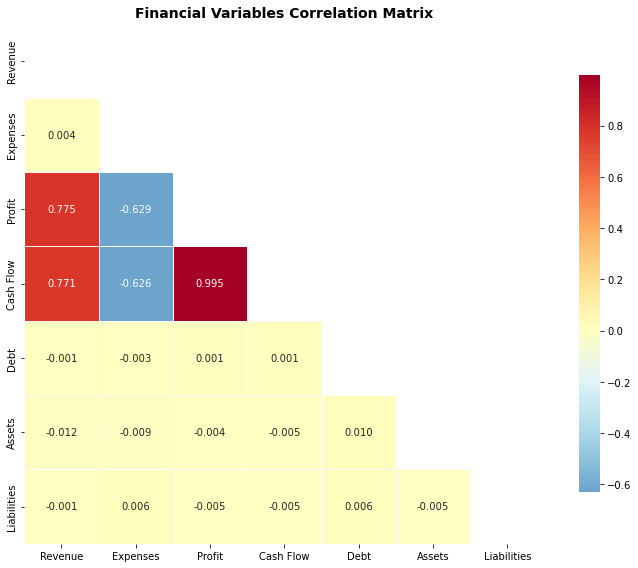

In [ ]:
# Calculate correlation matrix
print("CORRELATION ANALYSIS")

# Select relevant columns for correlation analysis
corr_columns = ['Revenue', 'Expenses', 'Profit', 'Cash Flow', 'Debt', 'Assets', 'Liabilities']
correlation_matrix = df_clean[corr_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Financial Variables Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [28]:
print("STRONG CORRELATIONS IDENTIFIED")

# Find correlations above 0.7 or below -0.7
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.7:  # Strong correlation threshold
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append((var1, var2, corr_value))

if strong_correlations:
    for var1, var2, corr in strong_correlations:
        direction = "positive" if corr > 0 else "negative"
        strength = "very strong" if abs(corr) >= 0.9 else "strong"
        print(f"\n{var1} vs {var2}:")
        print(f"  Correlation: {corr:.3f} ({strength} {direction})")
        
        # Provide interpretation
        if var1 == "Revenue" and var2 == "Expenses":
            print(f"  Interpretation: As revenue increases, expenses also tend to increase, which is typical in business operations.")
        elif var1 == "Assets" and var2 == "Liabilities":
            print(f"  Interpretation: Higher assets often correlate with higher liabilities, indicating company growth funded by debt.")
        elif "Profit" in [var1, var2]:
            print(f"  Interpretation: This relationship suggests profit is strongly linked to the company's overall financial performance.")
        else:
            print(f"  Interpretation: This strong correlation suggests these variables move together over time.")
else:
    print("No correlations above 0.7 threshold found.")

# Additional correlation insights
print("\n=== ADDITIONAL CORRELATION INSIGHTS ===")
revenue_profit_corr = correlation_matrix.loc['Revenue', 'Profit']
debt_profit_corr = correlation_matrix.loc['Debt', 'Profit']
assets_revenue_corr = correlation_matrix.loc['Assets', 'Revenue']

print(f"Revenue-Profit correlation: {revenue_profit_corr:.3f}")
print(f"Debt-Profit correlation: {debt_profit_corr:.3f}")
print(f"Assets-Revenue correlation: {assets_revenue_corr:.3f}")


STRONG CORRELATIONS IDENTIFIED

Revenue vs Profit:
  Correlation: 0.775 (strong positive)
  Interpretation: This relationship suggests profit is strongly linked to the company's overall financial performance.

Revenue vs Cash Flow:
  Correlation: 0.771 (strong positive)
  Interpretation: This strong correlation suggests these variables move together over time.

Profit vs Cash Flow:
  Correlation: 0.995 (very strong positive)
  Interpretation: This relationship suggests profit is strongly linked to the company's overall financial performance.

=== ADDITIONAL CORRELATION INSIGHTS ===
Revenue-Profit correlation: 0.775
Debt-Profit correlation: 0.001
Assets-Revenue correlation: -0.012


## Part 5: Summary of Findings and Analysis

Based on the analysis of the financial data, here are the main discoveries:

#### **1. Strong Relationships Between Key Metrics**

The correlation analysis revealed very strong connections:
- **Profit and Cash Flow**: 99.5% correlation - these move almost perfectly together
- **Revenue and Profit**: 77.5% correlation - higher revenue generally means higher profit  
- **Revenue and Cash Flow**: 77.1% correlation - cash flow follows revenue trends

#### **2. Consistent Financial Performance**

**Yearly Performance Summary:**
- **Revenue**: Stays around $21-22 million each year (very stable)
- **Profit Margin**: Averages 20.6% annually (good profitability)
- **Debt Management**: 30.1% debt-to-asset ratio (reasonable debt levels)

#### **3. Overall Financial Health Indicators**

- **Average profit per transaction**: $12,259
- **Consistent revenue**: Revenue stays stable around $59,500 per period
- **Manageable expenses**: Average $47,250 per period
- **Positive cash flow**: Average $12,248 per period

### **Key Trends and Observations**

**Pros:**
- Revenue remains very stable year after year
- Profit margins stay consistently around 20%
- Strong positive cash flow
- Debt levels are reasonable (30% of assets)

**Cons:**
- Some periods show negative profits (minimum -$59,398)
- Cash flow can vary significantly (range from -$62,580 to +$86,768)

The business appears financially stable with predictable performance, making it a relatively low-risk operation.